In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

So we have 60000 images in total of size 32x32. Here the other 3 is the color (RGB)

Performing dataset visualization

In [22]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])
    plt.title(f"Class: {y_train[index]}")
    plt.axis("off")
    plt.show()

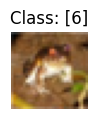

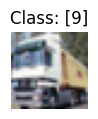

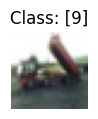

In [23]:
for i in range(3):
	plot_sample(i)
	

Scalling

In [17]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

Performing encoding to the y

In [28]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10
)


In [29]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10
)

Model Building

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),  # this layer converts 3D arrays into 1D array
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'), # These are hidden layers
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = "SGD",
    loss = "categorical_crossentropy", # Here we used categorical crossentropy because we have output parameter as one hot encoded and not discrete values.
    metrics = ["accuracy"]
)

model.fit(X_train_scaled, y_train_categorical, epochs=50)

C:\Users\dhruv\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3535 - loss: 1.8134
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3535 - loss: 1.8134
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4280 - loss: 1.6227
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4280 - loss: 1.6227
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4573 - loss: 1.5405
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4573 - loss: 1.5405
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4787 - loss: 1.4793
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4787 - loss: 1.4793
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4972 - loss: 1.4314
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4972 - loss: 1.4314
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5134 - loss: 1.3871
Epoch 7/50

So we got model accuracy to be nearly 91%

In [40]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [42]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


'ship'

In [41]:
classes[y_test[1][0]]

'ship'